In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
patch_size = (80,71) #[1, 2, 4, 8, 71, 142, 284, 568]



*    **Prediction**



In [2]:
def divide_image_into_patches(image_path, patch_size):
    image =  cv2.imread(image_path)
    height, width = image.shape[:2]
    patch_height, patch_width = patch_size
    patches = []
    cpt = 0
    for y in range(0, height, patch_height):
        for x in range(0, width, patch_width):
            patch = image[y:y+patch_height, x:x+patch_width]
            patches.append(patch)
            cpt+=1
    return patches,cpt

In [3]:
def get_patches_mask(patches_mask):
  cpt_R = 0
  cpt_G = 0
  for i,patch in enumerate(patches_mask):
    first_pixel = patch[0, 0]
    if (first_pixel == [0, 255, 0]).all():
     cpt_G += 1
    elif (first_pixel == [0, 0, 255]).all():
     cpt_R += 1
  return cpt_R , cpt_G

In [4]:
def calculate_ratios(cpt_R, cpt_G):
    return cpt_R / 40, cpt_G / 40

In [ ]:
dossier_H = "/content/drive/MyDrive/TER Data/Color maps/Holo"
dossier_NH = "/content/drive/MyDrive/TER Data/Color maps/No-Holo"

In [ ]:
dossier_H = "/content/drive/MyDrive/TER Data/Color maps best epoch/Holo"
dossier_NH = "/content/drive/MyDrive/TER Data/Color maps best epoch/No-Holo"

In [ ]:
dossier_H = "/content/drive/MyDrive/TER Data/Color maps best model 93.17/Holo"
dossier_NH = "/content/drive/MyDrive/TER Data/Color maps best model 93.17/No-Holo"

In [ ]:
dossier_H = "/content/drive/MyDrive/TER Data/Color maps best model last epoch/Holo"
dossier_NH = "/content/drive/MyDrive/TER Data/Color maps best model last epoch/No-Holo"

In [5]:
dossier_H = "/content/drive/MyDrive/TER Data/final best color maps/Holo"
dossier_NH = "/content/drive/MyDrive/TER Data/final best color maps/No-Holo"

In [ ]:
dossier_H = "/content/drive/MyDrive/TER Data/final best color maps photorep/Holo"
dossier_NH = "/content/drive/MyDrive/TER Data/final best color maps photorep/No-Holo"

In [ ]:
dossier_H = "/content/drive/MyDrive/TER Data/final best color maps 40x40/Holo"
dossier_NH = "/content/drive/MyDrive/TER Data/final best color maps 40x40/No-Holo"

In [6]:
prediction = []
actual_calss = []


red_ratios = []
green_ratios = []
labels = []


for path in [dossier_H,dossier_NH]:
  for item in os.listdir(path):
          if os.path.isfile(os.path.join(path, item)) :
              patches,cpt = divide_image_into_patches(str(os.path.join(path, item)), patch_size)
              cpt_R , cpt_G = get_patches_mask(patches)
              red_ratio, green_ratio = calculate_ratios(cpt_R, cpt_G)
              red_ratios.append(red_ratio)
              green_ratios.append(green_ratio)

              if path ==  dossier_H :
                labels.append("Holo")
              else:
                labels.append("No-Holo")


In [7]:
red_ratios = np.array(red_ratios).reshape(-1, 1)
green_ratios = np.array(green_ratios).reshape(-1, 1)
features = red_ratios

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=41)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [9]:
from sklearn.linear_model import LogisticRegression

# Create and fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Extract coefficients
slope = logistic_model.coef_[0][0]
intercept = logistic_model.intercept_[0]

# Calculate threshold point (where predicted probability is 0.5)
threshold = -intercept / slope

print("Threshold Point:", threshold)

Threshold Point: 0.6961121414655435


In [10]:
threshold = 0.6961121414655435

In [11]:
def plot_points_1d_with_threshold(X, y, threshold, title):
    plt.figure(figsize=(32, 15))
    colors = ['red' if label == 'Holo' else 'green' for label in y]
    plt.scatter(X, np.zeros_like(X), c=colors, s=30)
    plt.axvline(x=threshold, color='blue', linestyle='--', linewidth=2, label='Threshold')
    for i, txt in enumerate(y):
        plt.annotate(txt, (X[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title(title)
    plt.xlabel("Red Ratio")
    plt.legend()
    plt.yticks([])  # Remove y-axis ticks
    plt.show()

def plot_comparison_1d_with_threshold(X_train, y_train, X_test, y_test, classifier, threshold):
    # Fit the classifier
    classifier.fit(X_train.reshape(-1, 1), y_train)

    # Predict classes
    y_pred_train = classifier.predict(X_train.reshape(-1, 1))
    y_pred_test = classifier.predict(X_test.reshape(-1, 1))

    plt.figure(figsize=(24, 12))

    plt.subplot(1, 2, 1)
    colors_train = ['red' if label == 'Holo' else 'green' for label in y_pred_train]
    plt.scatter(X_train, np.zeros_like(X_train), c=colors_train, s=30)
    plt.axvline(x=threshold, color='blue', linestyle='--', linewidth=2, label='Threshold')
    for i, txt in enumerate(y_pred_train):
        plt.annotate(txt, (X_train[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title("Predicted (Training)")
    plt.xlabel("Red Ratio")
    plt.legend()
    plt.yticks([])  # Remove y-axis ticks

    plt.subplot(1, 2, 2)
    colors_test = ['red' if label == 'Holo' else 'green' for label in y_pred_test]
    plt.scatter(X_test, np.zeros_like(X_test), c=colors_test, s=30)
    plt.axvline(x=threshold, color='blue', linestyle='--', linewidth=2, label='Threshold')
    for i, txt in enumerate(y_pred_test):
        plt.annotate(txt, (X_test[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title("Predicted (Testing)")
    plt.xlabel("Red Ratio")
    plt.legend()
    plt.yticks([])  # Remove y-axis ticks

    plt.tight_layout()
    plt.show()


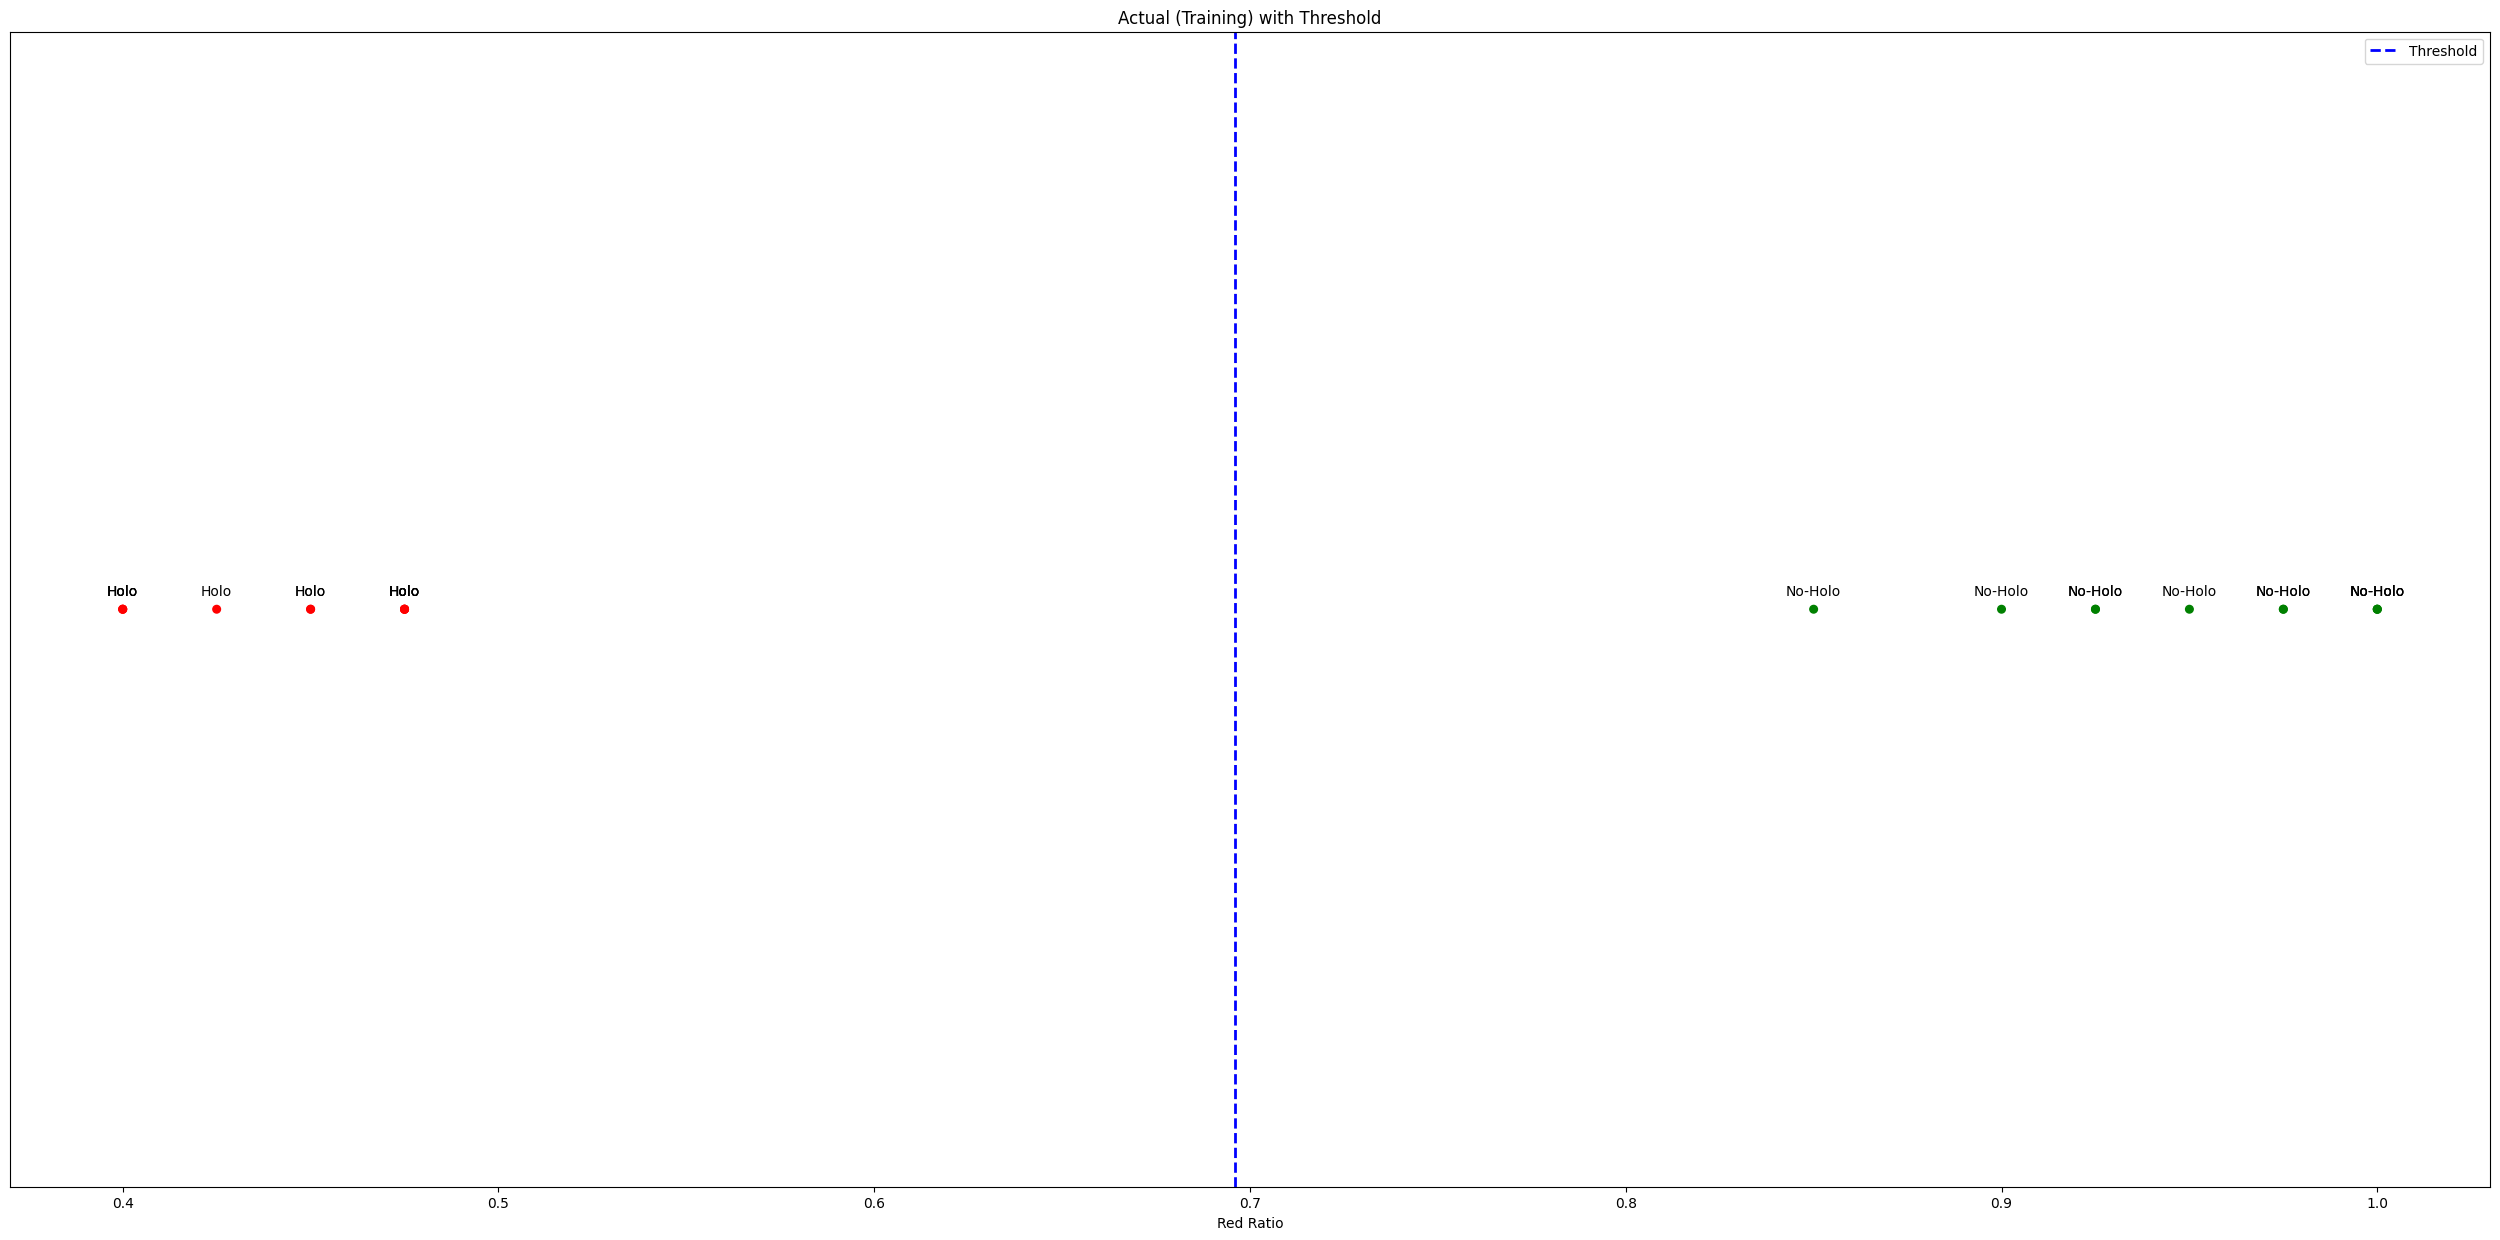

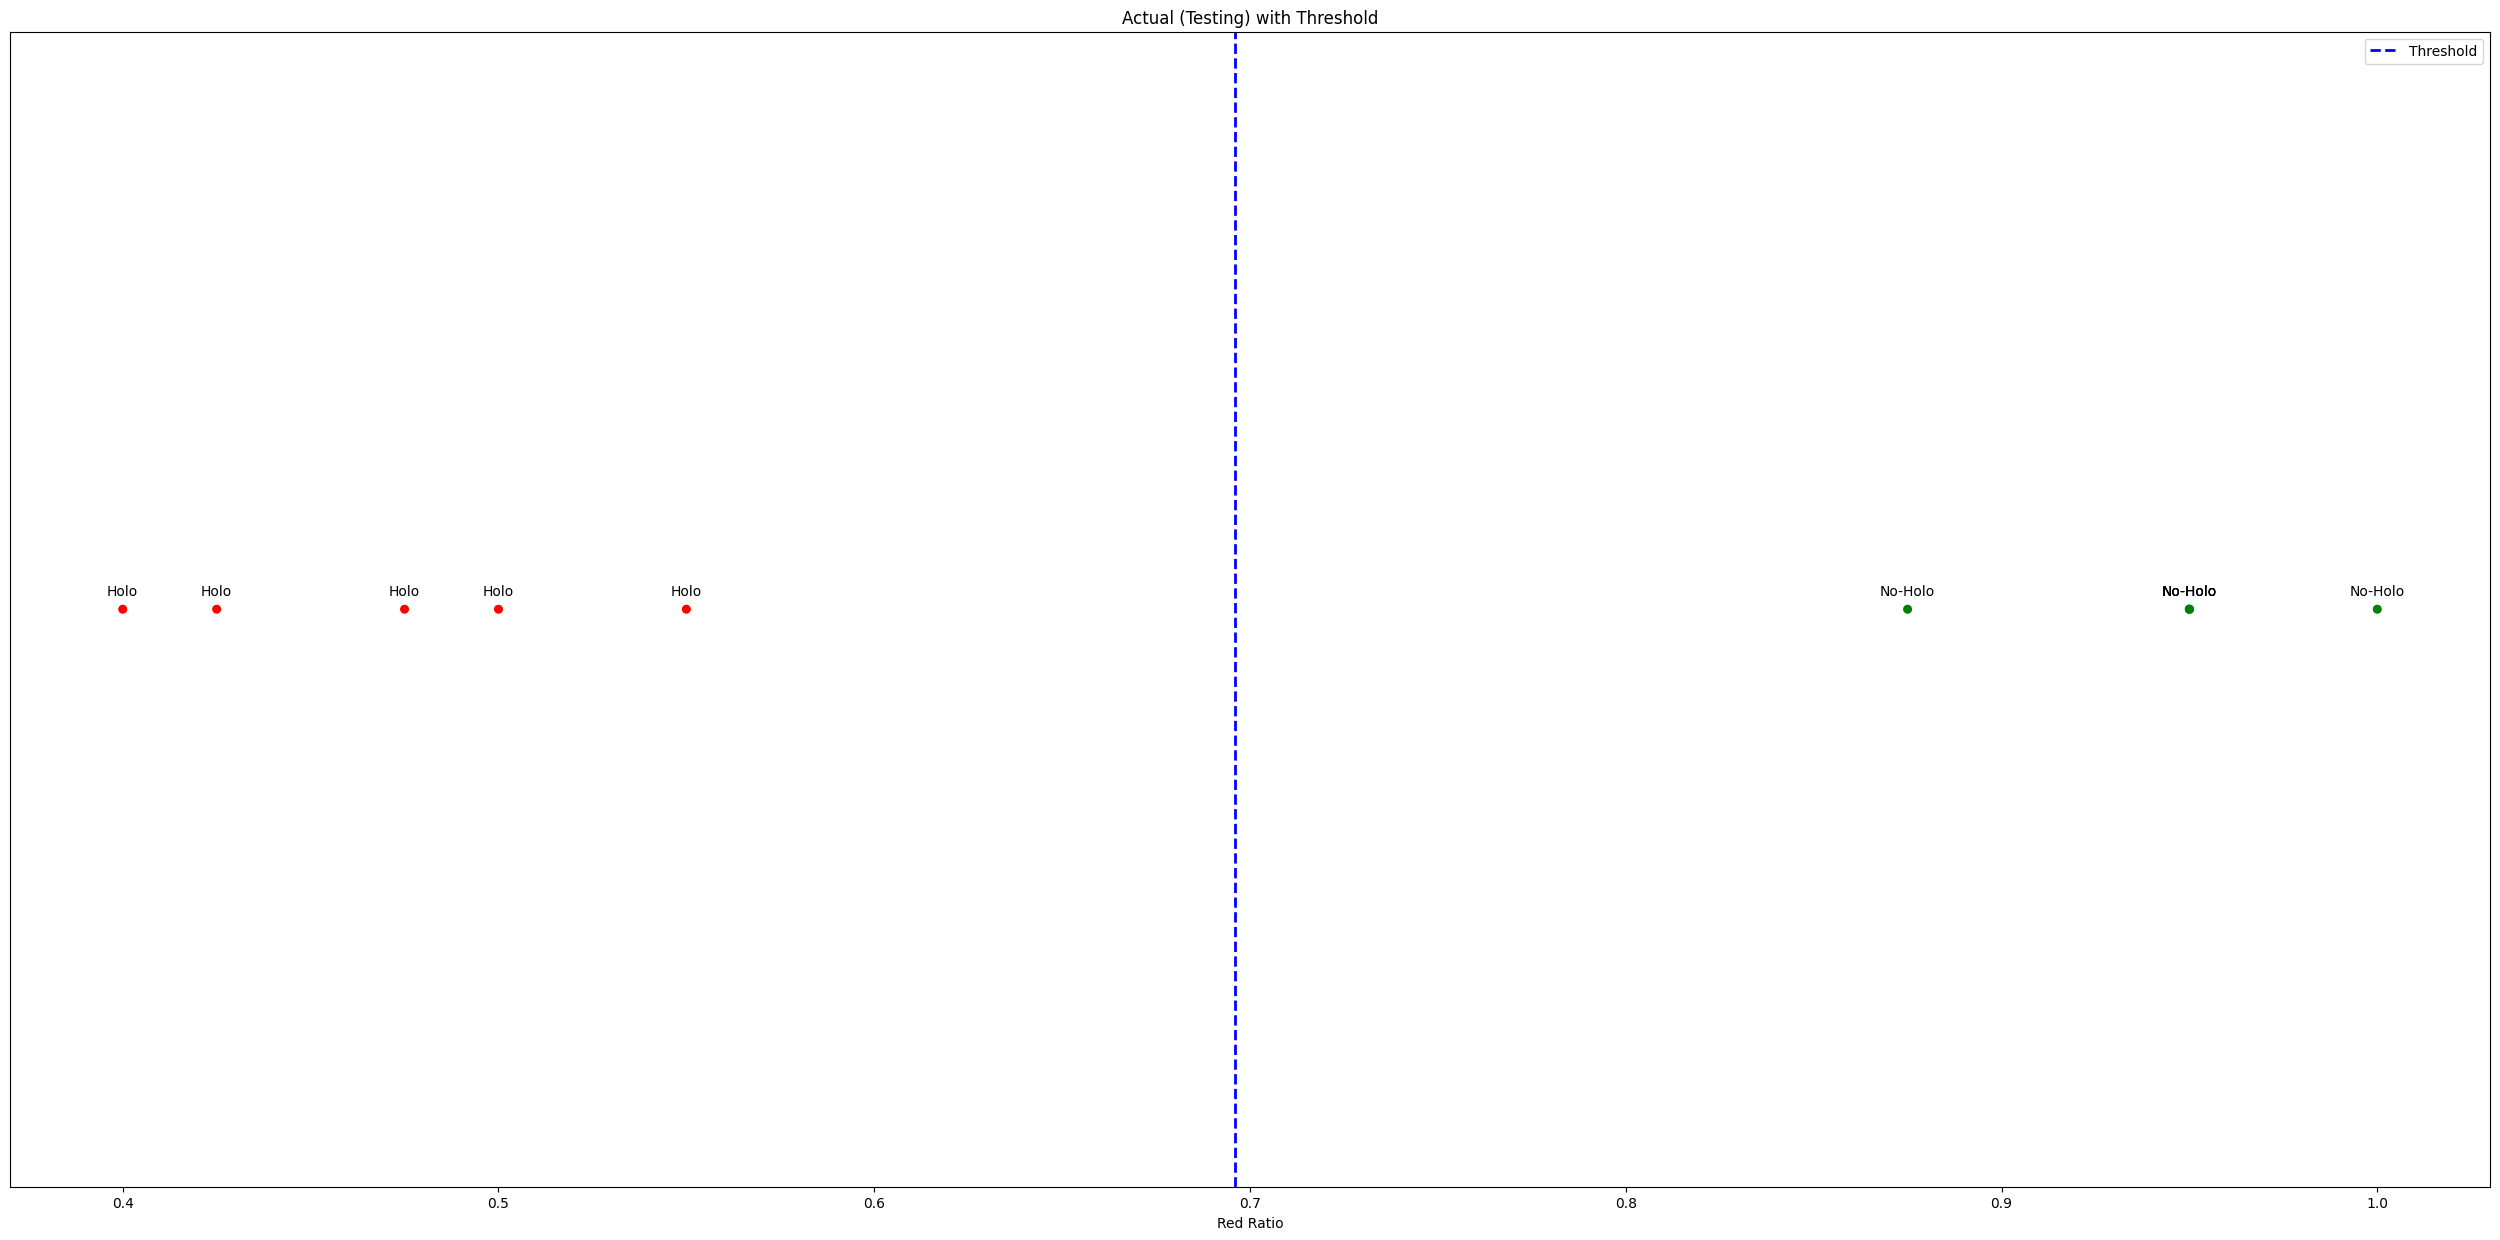

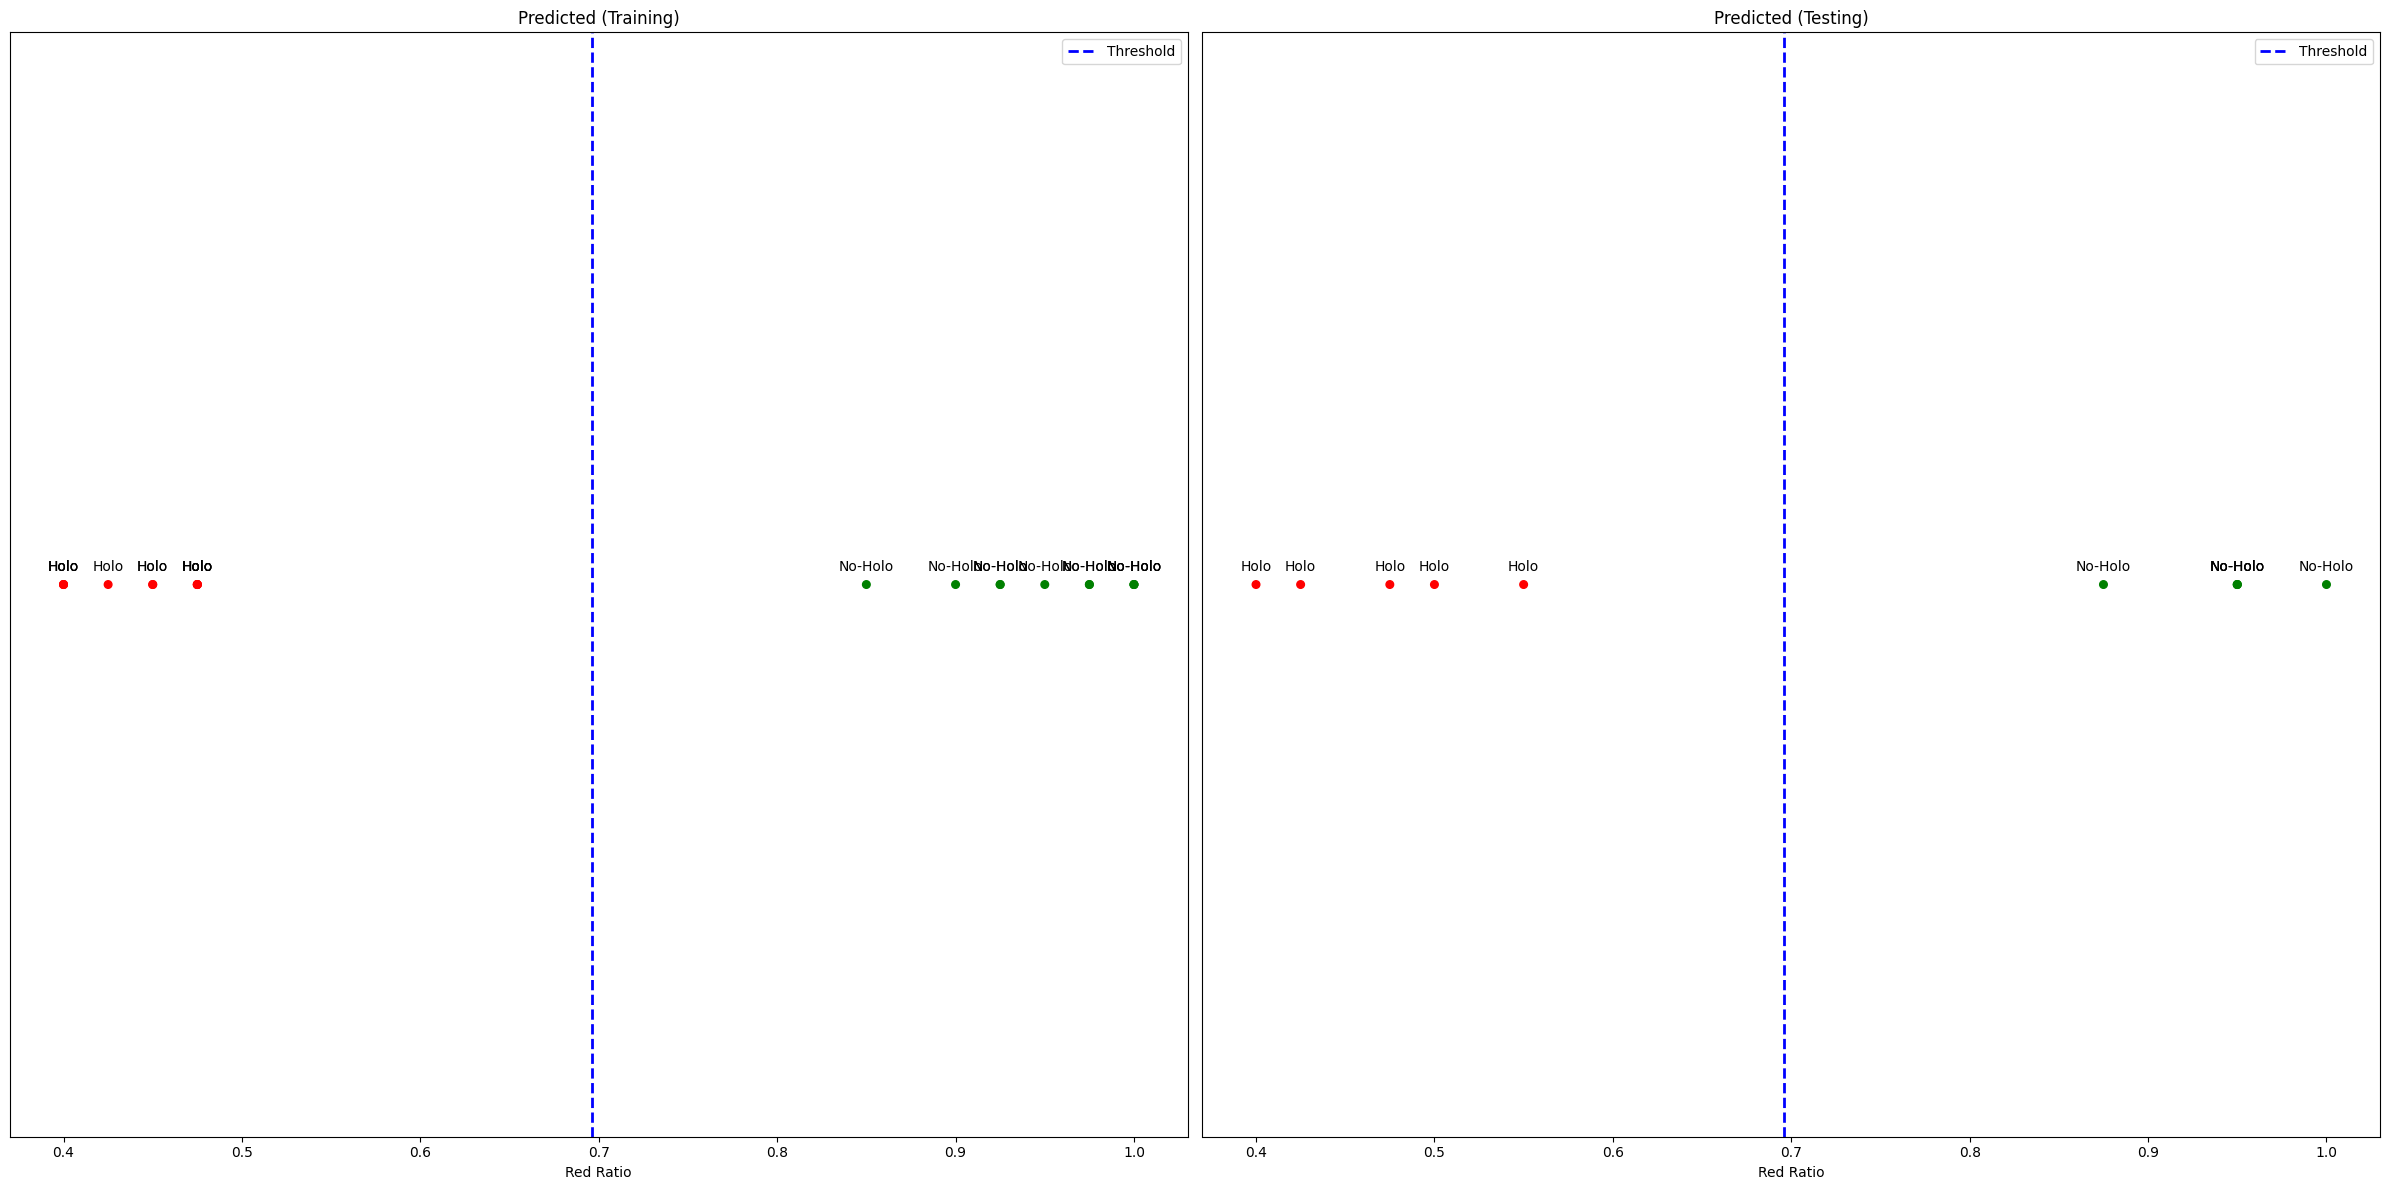

In [12]:
# Plot actual points with threshold
plot_points_1d_with_threshold(X_train, y_train, threshold, "Actual (Training) with Threshold")
plot_points_1d_with_threshold(X_test, y_test, threshold, "Actual (Testing) with Threshold")

# Plot comparison with a classifier (e.g., KNN or SVM) with threshold
plot_comparison_1d_with_threshold(X_train, y_train, X_test, y_test, logistic_model, threshold)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison_1d_with_threshold(X_train, y_train, X_test, y_test, classifier, threshold):
    # Fit the classifier
    classifier.fit(X_train.reshape(-1, 1), y_train)

    # Predict classes
    y_pred_train = classifier.predict(X_train.reshape(-1, 1))
    y_pred_test = classifier.predict(X_test.reshape(-1, 1))

    plt.figure(figsize=(24, 12))

    plt.subplot(1, 2, 1)
    colors_train_pred = ['red' if label == 'Holo' else 'green' for label in y_pred_train]
    plt.scatter(X_train, np.zeros_like(X_train), c=colors_train_pred, s=30, label='Predicted')
    colors_train_actual = ['orange' if label == 'Holo' else 'purple' for label in y_train]
    plt.scatter(X_train, np.ones_like(X_train), c=colors_train_actual, s=30, label='Actual')
    plt.axvline(x=threshold, color='blue', linestyle='--', linewidth=2, label='Threshold')
    for i, txt in enumerate(y_pred_train):
        plt.annotate(txt, (X_train[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
    for i, txt in enumerate(y_train):
        plt.annotate(txt, (X_train[i], 1), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title("Predicted vs Actual (Training)")
    plt.xlabel("Red Ratio")
    plt.legend()
    plt.yticks([])  # Remove y-axis ticks

    plt.subplot(1, 2, 2)
    colors_test_pred = ['red' if label == 'Holo' else 'green' for label in y_pred_test]
    plt.scatter(X_test, np.zeros_like(X_test), c=colors_test_pred, s=30, label='Predicted')
    colors_test_actual = ['orange' if label == 'Holo' else 'purple' for label in y_test]
    plt.scatter(X_test, np.ones_like(X_test), c=colors_test_actual, s=30, label='Actual')
    plt.axvline(x=threshold, color='blue', linestyle='--', linewidth=2, label='Threshold')
    for i, txt in enumerate(y_pred_test):
        plt.annotate(txt, (X_test[i], 0), textcoords="offset points", xytext=(0,10), ha='center')
    for i, txt in enumerate(y_test):
        plt.annotate(txt, (X_test[i], 1), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title("Predicted vs Actual (Testing)")
    plt.xlabel("Red Ratio")
    plt.legend()
    plt.yticks([])  # Remove y-axis ticks

    plt.tight_layout()
    plt.show()


In [ ]:
plot_comparison_1d_with_threshold(X_train, y_train, X_test, y_test, logistic_model, threshold)